# Introdução

Esse projeto trabalhará com o problema MNIST (Modified National Institute of Standards and Technology), é um clássico da área de reconhecimento de padrões e aprendizado de máquina. Ele envolve um conjunto de dados amplamente utilizado para testar algoritmos de classificação, especialmente redes neurais e técnicas de aprendizado profundo (deep learning).   
O conjunto de dados MNIST consiste em:  
- Imagens de dígitos manuscritos de 0 a 9.
- 60.000 exemplos de treino e 10.000 exemplos de teste.
- Cada imagem tem 28x28 pixels e é monocromática (escala de cinza).
- O valor de cada pixel varia de 0 (preto) a 255 (branco), com várias tonalidades de cinza intermediárias.

O objetivo é classificar cada uma dessas imagens como um dos 10 dígitos possíveis (0 a 9). Isso envolve o treinamento de um modelo de classificação que aprenda a reconhecer os padrões que distinguem os diferentes dígitos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#Talvez seja necessário relaizar a instalação dessas bibliotecas na máquina.

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x = mnist['data'].values
y = (mnist['target'].values).astype(np.float64)

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y

array([5., 0., 4., ..., 4., 5., 6.])

4.0


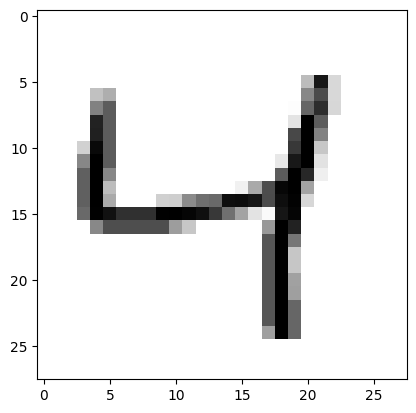

In [8]:
n = 2
plt.imshow(x[n].reshape(28, 28), cmap='binary')
print(y[n])
plt.show()

## Classificador Binário

O classificador binário trabalha com dados de "sim" ou "não". Então, nesse primeiro momento esse modelo será treinado para dizer quando um número é igual a 5 dentre os números do conjunto de dados MNIST.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
#Obtendo um conjunto de boleanos (true e false) 
y_train_5 = (y_train == 5)

In [12]:
y_train_5

array([False, False, False, ..., False, False, False])

In [14]:
pd.Series(y_train_5).value_counts()

False    44578
True      4422
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real : True
Classe predita pelo modelo : [ True]


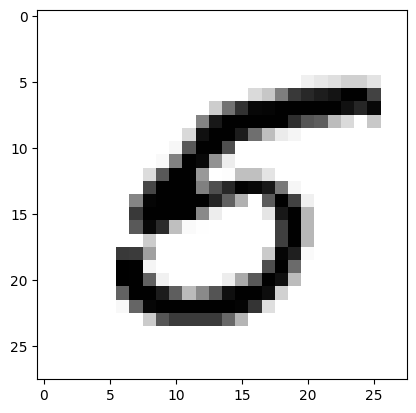

In [76]:
#Testando alguns valores
n = 15
plt.imshow(x_train[n].reshape(28, 28), cmap='binary')
print('Classe real :', y_train_5[n])
print('Classe predita pelo modelo :',sgd_clf.predict([x_train[n]]))

Agora, será aplicado o Cross-Validation para mensurar a permonace do modélo.

In [6]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9668789 , 0.96412172, 0.96442785])

Apesar dos bons valores de acurácia, isso não necessariamente quer dizer que o modélo é tão preciso assim, pois a própria distribuição dos dados é de aproximadamente 10% dos dados True para 90% dos dados False, e isso influenciou nos resultados. Se o modelo apenas predicesse False para todos os valores, ele ainda assim teria bons valores de acurácia por causa da distribuição dos dados.

In [79]:
from sklearn.base import BaseEstimator

class modelo_burro (BaseEstimator):
  def fit (self, X, y=None):
    pass
  def predict (self, X):
    return np.zeros((len(X), 1), dtype=bool)#Retorna uma lista de False

In [80]:
nunca_5 = modelo_burro()
cross_val_score(nunca_5, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.91141178, 0.9107941 , 0.90705933])

Isso exemplifica o que foi dito anteriormente.

## Matriz de Confusão

A matriz de confusão é a melhor forma de analisar o desempenho de um modélo binário. Para saber mais sobre matriz de confusão clique [aqui](./confusion_matrix.md).

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44132,   446],
       [  946,  3476]], dtype=int64)

A matriz diz que o modelo classificou 44132 valores como False e que eram de fato False, 946 como False mas eram na realidade True, 446 como True mas na realidade eram False e 3476 como True que de fato eram True.

In [7]:
from sklearn.metrics import precision_score, recall_score

In [84]:
y_predict = sgd_clf.predict(x_train)
print('Precisão : ',precision_score(y_train_5, y_predict))
print('Recall : ',recall_score(y_train_5, y_predict))

Precisão :  0.8862825089240184
Recall :  0.7860696517412935


In [8]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_train_5, y_predict))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98     44578
        True       0.89      0.79      0.83      4422

    accuracy                           0.97     49000
   macro avg       0.93      0.89      0.91     49000
weighted avg       0.97      0.97      0.97     49000



Pode-se perceber que a precisão do modelo foi alta, 89%, e o recall foi um pouquinho mais baixo, 79%, a diferença entre a precisão e o recall não é tal alta o que faz com que o f1-score não sofra uma penalização severa, ficando em 83%. Esses resulatdos dão uma ideia mais realista da performance do modelo de classificação binária.

## Modélo de Classificação Multiclasse

O próximo modelo tentara prever qual é o valor representado na imagem. Lembrando que os valores representados são os digitos de 0 a 9 feitos a mão.

In [88]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

array([6.])

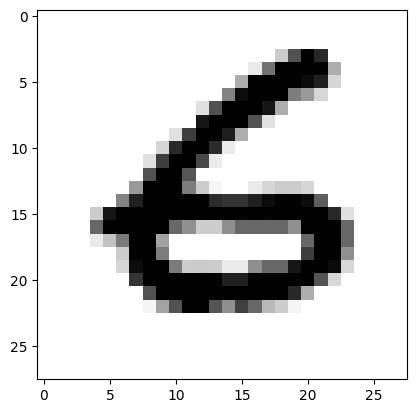

In [113]:
n = 22
digit = x_train[n]
plt.imshow(digit.reshape(28, 28), cmap='binary')
sgd_clf.predict([digit])


In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [115]:
conf_mx = confusion_matrix(y_train, y_predict)
print(conf_mx)
print(classification_report(y_train, y_predict))

[[4666    0   20   16    9   15   13    5   48    8]
 [   3 5287   32   53    4   14    6   11   56   12]
 [ 125   57 4063  329   62   24   69   65  143   21]
 [  38    9  117 4594    7   78    9   52   65   48]
 [  36   20   22   39 4205    9   36   55  100  224]
 [ 112   24   35  391   62 3373   82   32  209  102]
 [  71   15   48   31   17   75 4521    8   96    3]
 [  26   12   63   83   70   10    2 4453   34  297]
 [  91  103   81  489   21  148   39   25 3627  162]
 [  51   19   27  229  148   56    0  492  322 3514]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      4800
         1.0       0.95      0.97      0.96      5478
         2.0       0.90      0.82      0.86      4958
         3.0       0.73      0.92      0.82      5017
         4.0       0.91      0.89      0.90      4746
         5.0       0.89      0.76      0.82      4422
         6.0       0.95      0.93      0.94      4885
         7.0       0.86      0.88   

Podemos usar o Heatmap para visualizar melhor a matriz de confusão.

<Axes: >

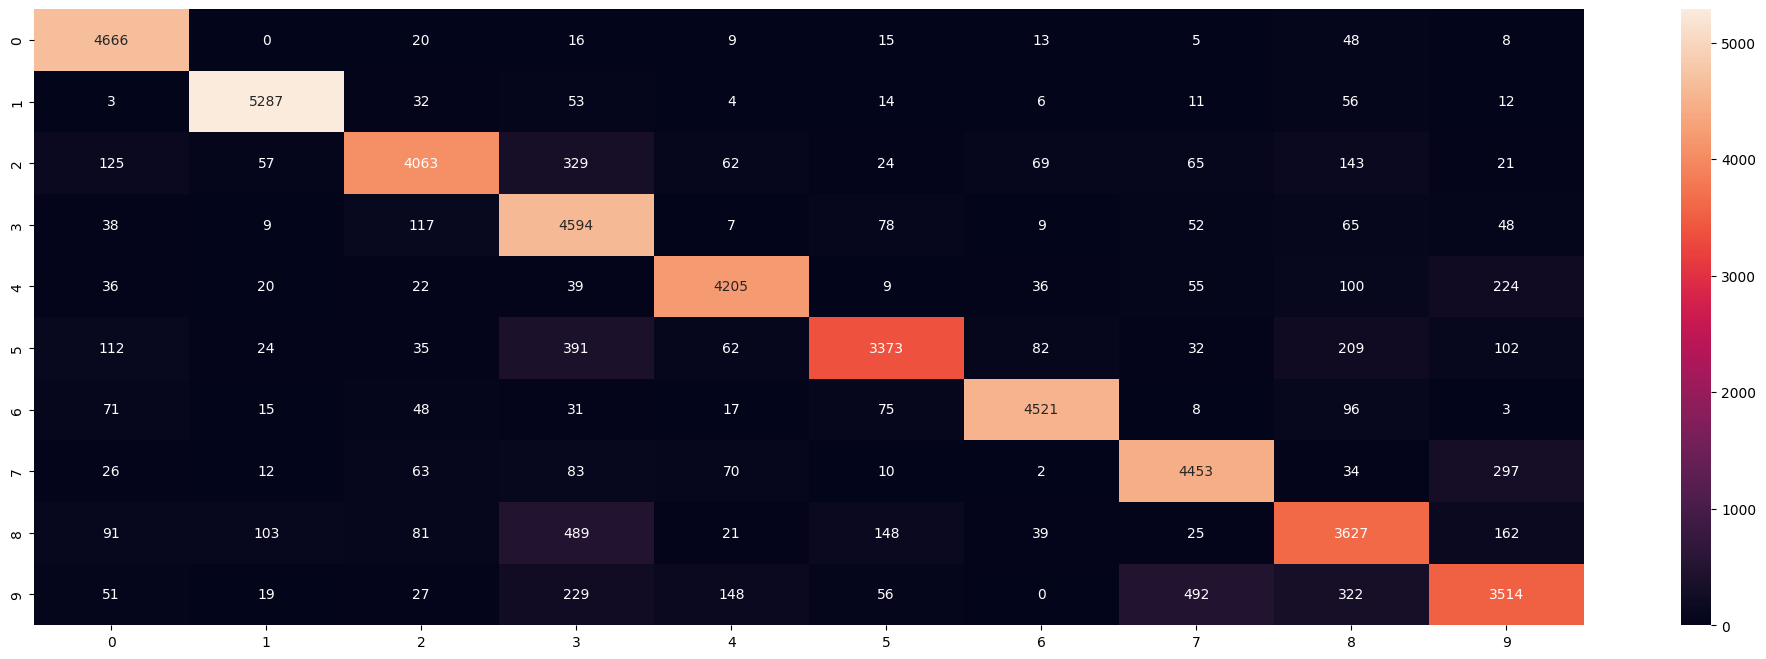

In [117]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt='.0f')

A matriz de confusão ficou melhor de ser visualizada. E é possível concluir que o modelo performou muito bem com o dados de treino.

## Multilabel

Esse modelo é capaz de fornecer mais de uma informação sobre uma classe.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
y_train_larger = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_larger, y_train_odd]#Conjunto com os valores maiores ou iguais a 7 e valores ímpares.

In [12]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

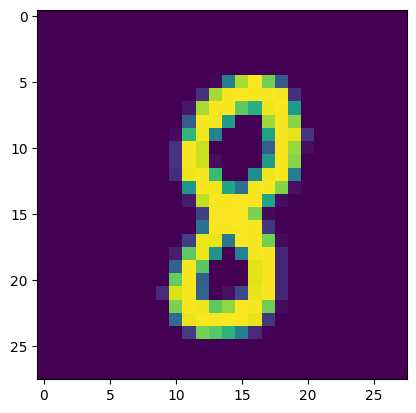

In [27]:
n = 62
digit = x_train[n]
plt.imshow(digit.reshape(28, 28))

In [28]:
print('É maior ou igual a 7 :',knn_clf.predict([digit])[0][0])
print('É ímpar :',knn_clf.predict([digit])[0][1])

É maior ou igual a 7 : True
É ímpar : False
